In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
data = datasets.load_iris()

#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)

In [2]:
print(df.shape)

(150, 5)


In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


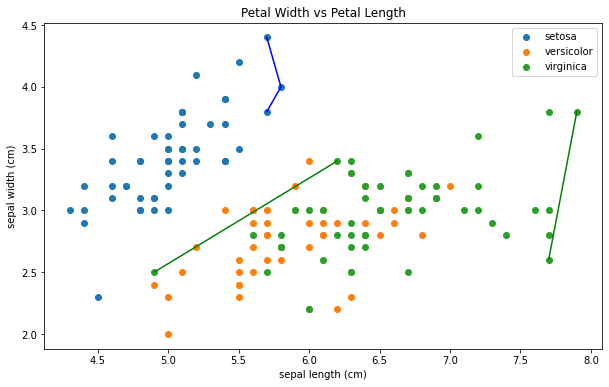

In [4]:
#visualisasi hasil ConvexHull
import matplotlib.pyplot as plt
from scipy import linalg
import myConvexHull

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    k = i
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])

    jarakmax2titik = 0
    titik1 = bucket[0]
    titik2 = bucket[0]
    for i in range(len(bucket)):
        for j in range(len(bucket)):
            jarak2titik = myConvexHull.jarak2titik(bucket[i], bucket[j])
            if (jarak2titik >= jarakmax2titik):
                jarakmax2titik = jarak2titik
                titik1 = bucket[i]
                titik2 = bucket[j]

    bagian1 = []
    bagian2 = []
    for i in range(len(bucket)):
        if (myConvexHull.kiriatas(titik1, titik2, bucket[i])):
            bagian1.append(bucket[i])
        elif (myConvexHull.kananbawah(titik1, titik2, bucket[i])):
            bagian2.append(bucket[i])

    hull = []
    if (len(bagian1) == 0):
        hull.append((titik1, titik2))
    elif (len(bagian1) == 1):
        hull.append((titik1, bagian1[0]))
        hull.append((bagian1[0], titik2))
    else:
        jarakmaxtitikkegaris = 0
        titiksampel = bagian1[0]
        for i in range(len(bagian1)):
            jaraktitikkegaris = linalg.norm(np.cross(titik2-titik1, titik1-bagian1[i])) / linalg.norm(titik2-titik1)
            if (jaraktitikkegaris >= jarakmaxtitikkegaris):
                jarakmaxtitikkegaris = jaraktitikkegaris
                titiksampel = bagian1[i]

        bagian1part1 = []
        bagian1part2 = []
        for i in range(len(bagian1)):
            if (myConvexHull.kiriatas(titik1, titiksampel, bagian1[i])):
                bagian1part1.append(bagian1[i])
            if (myConvexHull.kananbawah(titiksampel, titik2, bagian1[i])):
                bagian1part2.append(bagian1[i])

        if (len(bagian1part1) == 0):
            hull.append((titik1, titiksampel))
        elif (len(bagian1part1) == 1):
            hull.append((titik1, bagian1part1[0]))
            hull.append((bagian1part1[0], titiksampel))

        if (len(bagian1part2) == 0):
            hull.append((titik2, titiksampel))
        elif (len(bagian1part2) == 1):
            hull.append((titik2, bagian1part2[0]))
            hull.append((bagian1part2[0], titiksampel))

    if (len(bagian2) == 0):
        hull.append((titik1, titik2))
    elif (len(bagian2) == 1):
        hull.append((titik1, bagian2[0]))
        hull.append((bagian2[0], titik2))
    else:
        jarakmaxtitikkegaris = 0
        titiksampel = bagian2[0]
        for i in range(len(bagian2)):
            jaraktitikkegaris = linalg.norm(np.cross(titik2-titik1, titik1-bagian2[i])) / linalg.norm(titik2-titik1)
            if (jaraktitikkegaris >= jarakmaxtitikkegaris):
                jarakmaxtitikkegaris = jaraktitikkegaris
                titiksampel = bagian2[i]

        bagian2part1 = []
        bagian2part2 = []
        for i in range(len(bagian2)):
            if (myConvexHull.kiriatas(titik1, titiksampel, bagian2[i])):
                bagian2part1.append(bagian2[i])
            if (myConvexHull.kananbawah(titiksampel, titik2, bagian2[i])):
                bagian2part2.append(bagian2[i])

        if (len(bagian2part1) == 0):
            hull.append((titik1, titiksampel))
        elif (len(bagian2part1) == 1):
            hull.append((titik1, bagian2part1[0]))
            hull.append((bagian2part1[0], titiksampel))

        if (len(bagian2part2) == 0):
            hull.append((titik2, titiksampel))
        elif (len(bagian2part2) == 1):
            hull.append((titik2, bagian2part2[0]))
            hull.append((bagian2part2[0], titiksampel))

    for i in range(len(hull)):
        x_values = [hull[i][0][0], hull[i][1][0]]
        y_values = [hull[i][0][1], hull[i][1][1]]
        plt.plot(x_values, y_values, colors[k])

plt.legend()